<a href="https://colab.research.google.com/github/SomaPrasadSahoo/Autoencoder_models/blob/main/Autoencoder_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References: https://www.kaggle.com/code/shivamb/how-autoencoders-work-intro-and-usecases

How Autoencoders work - Understanding the math and implementation¶
Contents
1. Introduction
1.1 What are Autoencoders ?
1.2 How Autoencoders Work ?
2. Implementation and UseCases
2.1 UseCase 1: Image Reconstruction
2.2 UseCase 2: Noise Removal
2.3 UseCase 3: Sequence to Sequence Prediction

**1. Introduction**

** What are Autoencoders**

Autoencoders are a special type of neural network architectures in which the output is same as the input. Autoencoders are trained in an unsupervised manner in order to learn the exteremely low level repersentations of the input data. These low level features are then deformed back to project the actual data. An autoencoder is a regression task where the network is asked to predict its input (in other words, model the identity function). These networks has a tight bottleneck of a few neurons in the middle, forcing them to create effective representations that compress the input into a low-dimensional code that can be used by the decoder to reproduce the original input.

A typical autoencoder architecture comprises of three main components:

Encoding Architecture : The encoder architecture comprises of series of
layers with decreasing number of nodes and ultimately reduces to a latent view repersentation.
Latent View Repersentation : Latent view repersents the lowest level space in which the inputs are reduced and information is preserved.
Decoding Architecture : The decoding architecture is the mirro image of the encoding architecture but in which number of nodes in every layer increases and ultimately outputs the similar (almost) input.
A highly fine tuned autoencoder model should be able to reconstruct the same input which was passed in the first layer. In this kernel, I will walk you through the working of autoencoders and their implementation. Autoencoders are widly used with the image data and some of their use cases are:

Dimentionality Reduction
Image Compression
Image Denoising
Image Generation
Feature Extraction
1.2 How Autoencoders work
Lets understand the mathematics behind autoencoders. The main idea behind autoencoders is to learn a low level repersenation of a high level dimentional data. Lets try to understand the encoding process with an example. Consider a data repersentation space (N dimentional space which is used to repersent the data) and consider the data points repersented by two variables : x1 and x2. Data Manifold is the space inside the data repersentation space in which the true data resides.

In [1]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import numpy as np
init_notebook_mode(connected=True)

## generate random data
N = 50
random_x = np.linspace(2, 10, N)
random_y1 = np.linspace(2, 10, N)
random_y2 = np.linspace(2, 10, N)
trace1 = go.Scatter(x = random_x, y = random_y1, mode="markers", name="Actual Data")
trace2 = go.Scatter(x = random_x, y = random_y2, mode="lines", name="Model")
layout = go.Layout(title="2D Data Repersentation Space", xaxis=dict(title="x2", range=(0,12)),
                   yaxis=dict(title="x1", range=(0,12)), height=400,
                   annotations=[dict(x=5, y=5, xref='x', yref='y', text='This 1D line is the Data Manifold (where data resides)',
                   showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
                   ax=-120, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='orange', opacity=0.8)])
figure = go.Figure(data = [trace1], layout = layout)
iplot(figure)

In [2]:
random_y3 = [2 for i in range(100)]
random_y4 = random_y2 + 1
trace4 = go.Scatter(x = random_x[4:24], y = random_y4[4:300], mode="lines")
trace3 = go.Scatter(x = random_x, y = random_y3, mode="lines")
trace1 = go.Scatter(x = random_x, y = random_y1, mode="markers")
trace2 = go.Scatter(x = random_x, y = random_y2, mode="lines")
layout = go.Layout(xaxis=dict(title="x1", range=(0,12)), yaxis=dict(title="x2", range=(0,12)), height=400,
                   annotations=[dict(x=2, y=2, xref='x', yref='y', text='A', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2,
                                     arrowcolor='#636363', ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='orange', opacity=0.8),
                                dict(x=6, y=6, xref='x', yref='y', text='B', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363',          ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='yellow', opacity=0.8), dict(
                                     x=4, y=5, xref='x', yref='y',text='d', ay=-40),
                                dict(x=2, y=2, xref='x', yref='y', text='angle L', ax=80, ay=-10)], title="2D Data Repersentation Space", showlegend=False)
data = [trace1, trace2, trace3, trace4]
figure = go.Figure(data = data, layout = layout)
iplot(figure)

#################

random_y3 = [2 for i in range(100)]
random_y4 = random_y2 + 1
trace4 = go.Scatter(x = random_x[4:24], y = random_y4[4:300], mode="lines")
trace3 = go.Scatter(x = random_x, y = random_y3, mode="lines")
trace1 = go.Scatter(x = random_x, y = random_y1, mode="markers")
trace2 = go.Scatter(x = random_x, y = random_y2, mode="lines")
layout = go.Layout(xaxis=dict(title="u1", range=(1.5,12)), yaxis=dict(title="u2", range=(1.5,12)), height=400,
                   annotations=[dict(x=2, y=2, xref='x', yref='y', text='A', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2,
                                     arrowcolor='#636363', ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='orange', opacity=0.8),      dict(x=6, y=6, xref='x', yref='y', text='B', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
                                     ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='yellow', opacity=0.8), dict(
                                     x=4, y=5, xref='x', yref='y',text='d', ay=-40),
                                dict(x=2, y=2, xref='x', yref='y', text='angle L', ax=80, ay=-10)], title="Latent Distance View Space", showlegend=False)
data = [trace1, trace2, trace3, trace4]
figure = go.Figure(data = data, layout = layout)
iplot(figure)

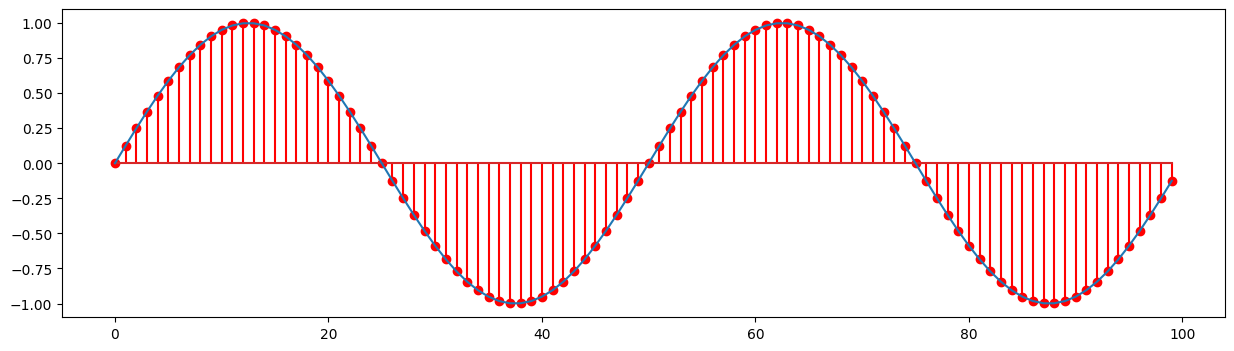

In [4]:
import matplotlib.pyplot as plt
import numpy as np
fs = 100 # sample rate
f = 2 # the frequency of the signal
x = np.arange(fs) # the points on the x axis for plotting
y = [ np.sin(2*np.pi*f * (i/fs)) for i in x]

# % matplotlib inline
plt.figure(figsize=(15,4))
plt.stem(x,y, 'r', );
plt.plot(x,y);

### **Use Cases**

## **Use Case 1**
**Image Reconstruction**

In [1]:
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D,UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np

In [13]:
!pip install imgaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 40.0 MB/s eta 0:00:00


In [15]:
!pip uninstall numpy keras tensorflow jax -y
!pip install numpy==1.23.5 keras tensorflow

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: jax 0.5.2
Uninstalling jax-0.5.2:
  Successfully uninstalled jax-0.5.2
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.9 MB/s eta 0:00:00
  Attempting uninstall:

Get Data from Kaggle

In [9]:
pip install opendatasets

In [10]:
import opendatasets as od

# Replace with the actual Kaggle dataset URL
dataset_url = "https://www.kaggle.com/datasets/thegeniusofntut/fashion-mnist-traincsv"

# Download and extract dataset
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Soma Prasad Sahoo
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/thegeniusofntut/fashion-mnist-traincsv


In [2]:
train = pd.read_csv("/content/fashion-mnist-traincsv/fashion-mnist_train.csv")
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values

## normalize and reshape the predictors
train_x = train_x / 255

## create train and validation datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

## reshape the inputs
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

**Create Autoencoder architecture**

In this section, lets create an autoencoder architecture. The encoding part comprises of three layers with 2000, 1200, and 500 nodes. Encoding architecture is connected to latent view space comprising of 10 nodes which is then connected to decoding architecture with 500, 1200, and 2000 nodes. The final layer comprises of exact number of nodes as the input layer.

In [6]:
input_layer=Input(shape=(784,))
## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)
## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       1,177,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1000)                │       1,501,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 500)                 │           5,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1000)                │         501,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1500)                │       1,501,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 784)                 │       1,176,784 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,368,794 (24.30 MB)

 Trainable params: 6,368,794 (24.30 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(train_x, train_x, epochs=20, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - loss: 0.1269 - val_loss: 0.0691
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - loss: 0.0660 - val_loss: 0.0517
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 0.0496 - val_loss: 0.0414
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - loss: 0.0405 - val_loss: 0.0373
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - loss: 0.0369 - val_loss: 0.0341
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - loss: 0.0335 - val_loss: 0.0312
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 0.0307 - val_loss: 0.0302
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - loss: 0.0294 - val_loss: 0.0267
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 0.0265 - val_loss: 0.0258
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - loss: 0.0253 - val_loss: 0.0241
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - loss: 0.0239 - val_loss: 0.0234
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - loss: 0.0231 - val_lo

In [9]:
preds = model.predict(val_x)

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


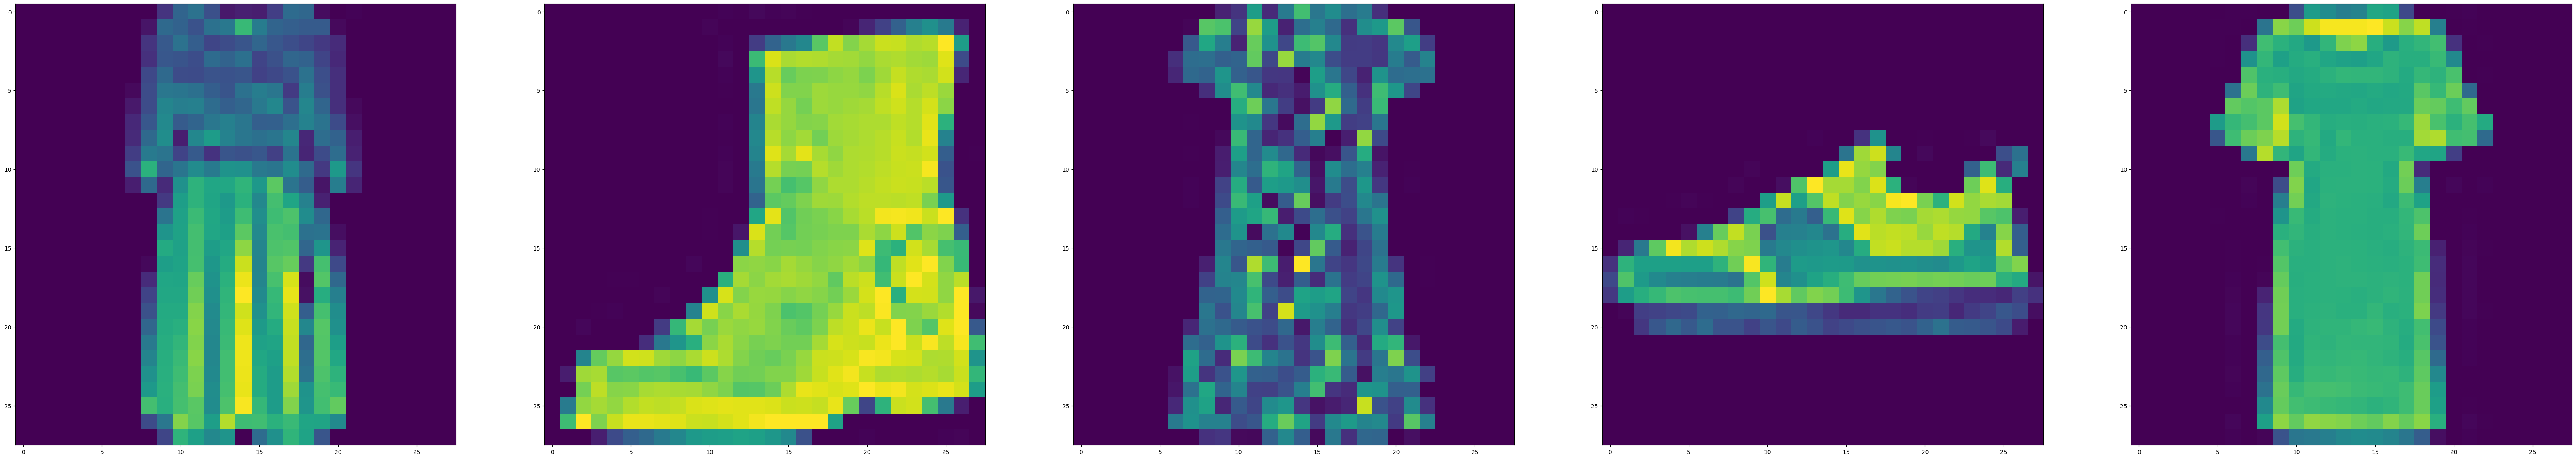

In [10]:
#Actual Images
from PIL import Image
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

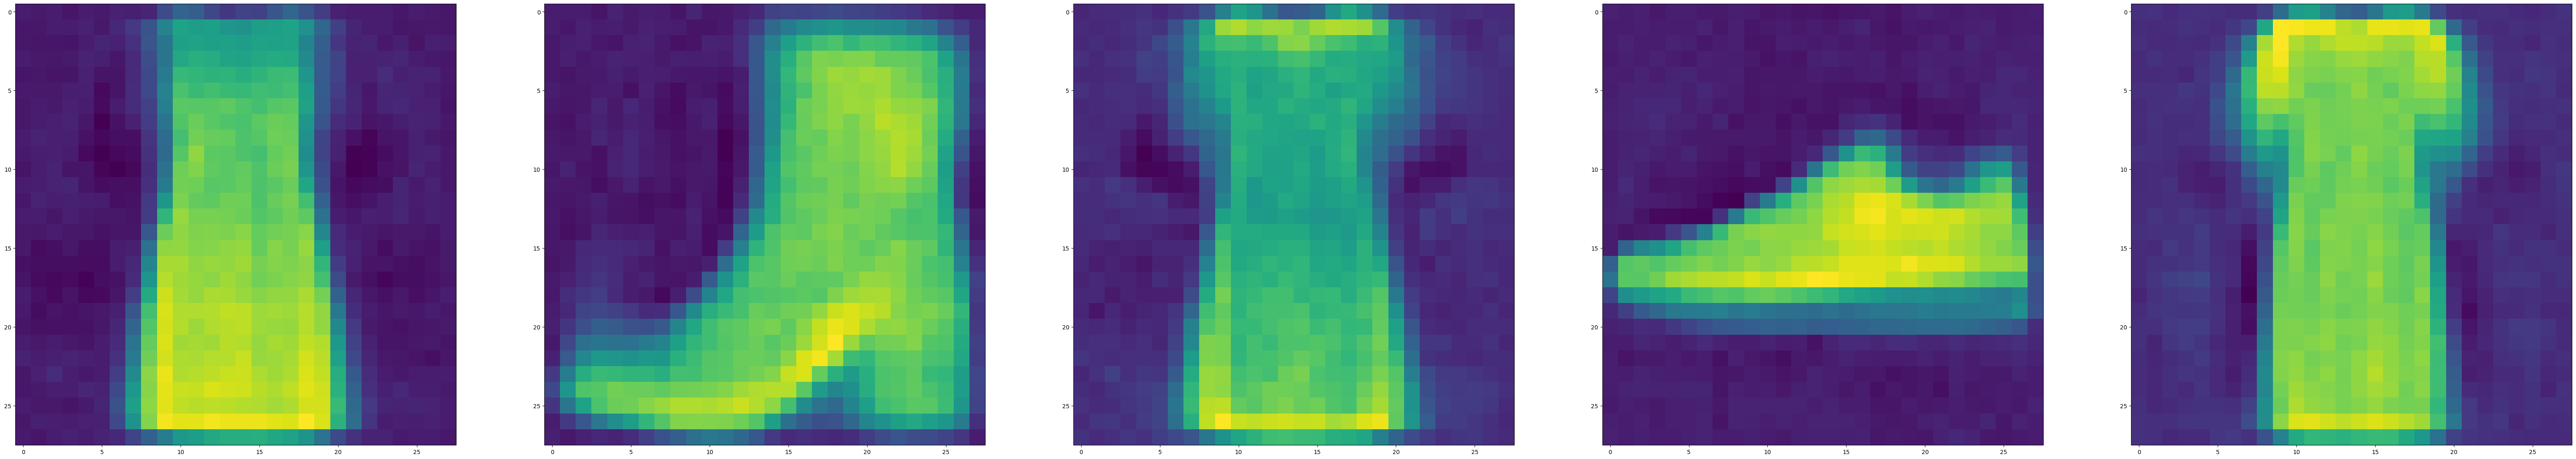

In [11]:
#Predicted images
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()

## **Use Case 2**
## **Image Denoising**

Autoencoders are pretty useful, lets look at another application of autoencoders - Image denoising. Many a times input images contain noise in the data, autoencoders can be used to get rid of those images. Lets see it in action. First lets prepare the train_x and val_x data contianing the image pixels.

In [3]:
## recreate the train_x array and val_x array
train_x = train[list(train.columns)[1:]].values
train_x, val_x = train_test_split(train_x, test_size=0.2)

## normalize and reshape
train_x = train_x/255.
val_x = val_x/255.

In [8]:
train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)

In [9]:
# Lets add sample noise - Salt and Pepper
noise = augmenters.SaltAndPepper(0.1)
seq_object = augmenters.Sequential([noise])

train_x_n = seq_object.augment_images(train_x * 255) / 255
val_x_n = seq_object.augment_images(val_x * 255) / 255

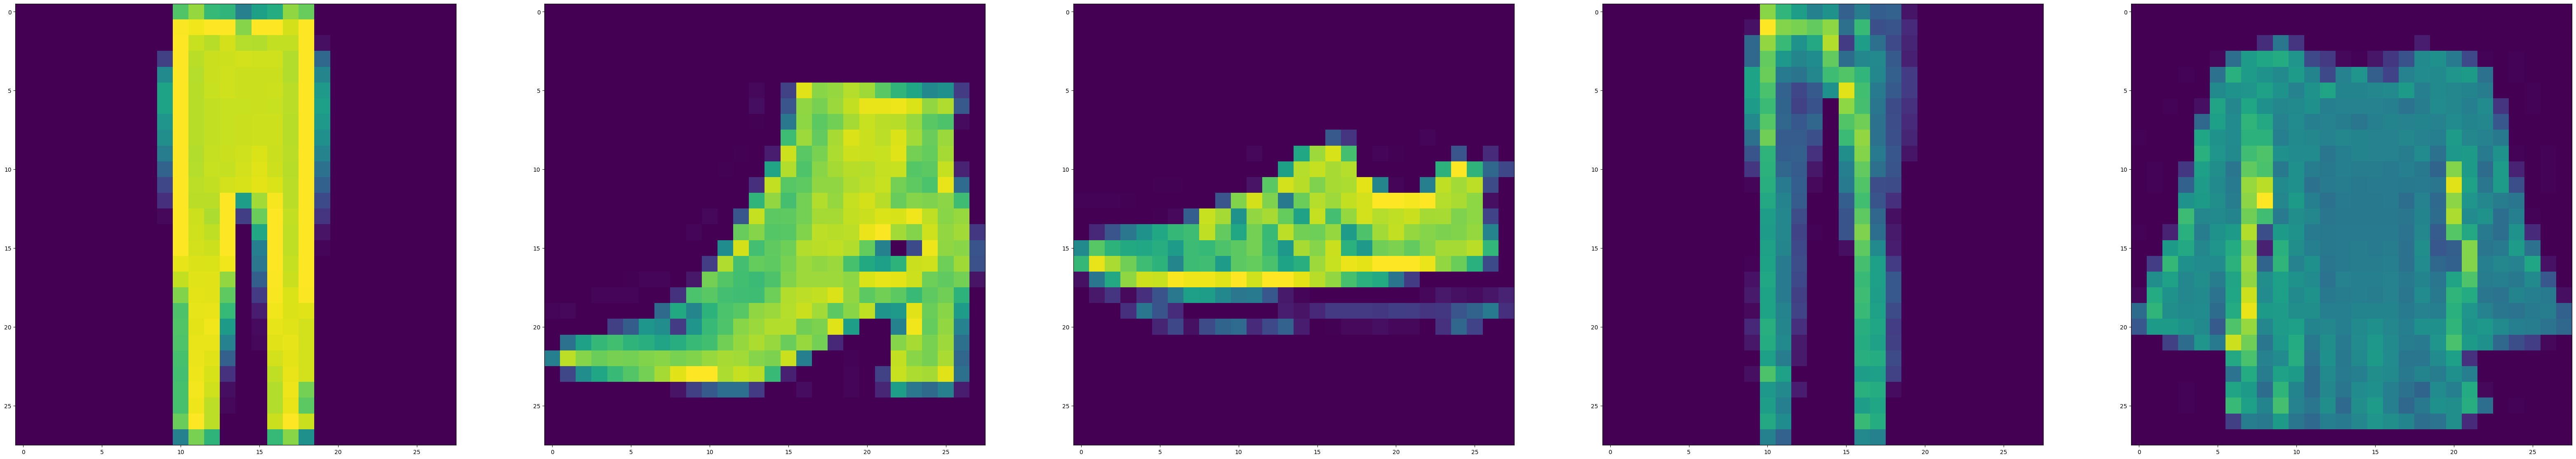

In [15]:
# Before adding noise
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x[i].reshape(28, 28))
plt.show()

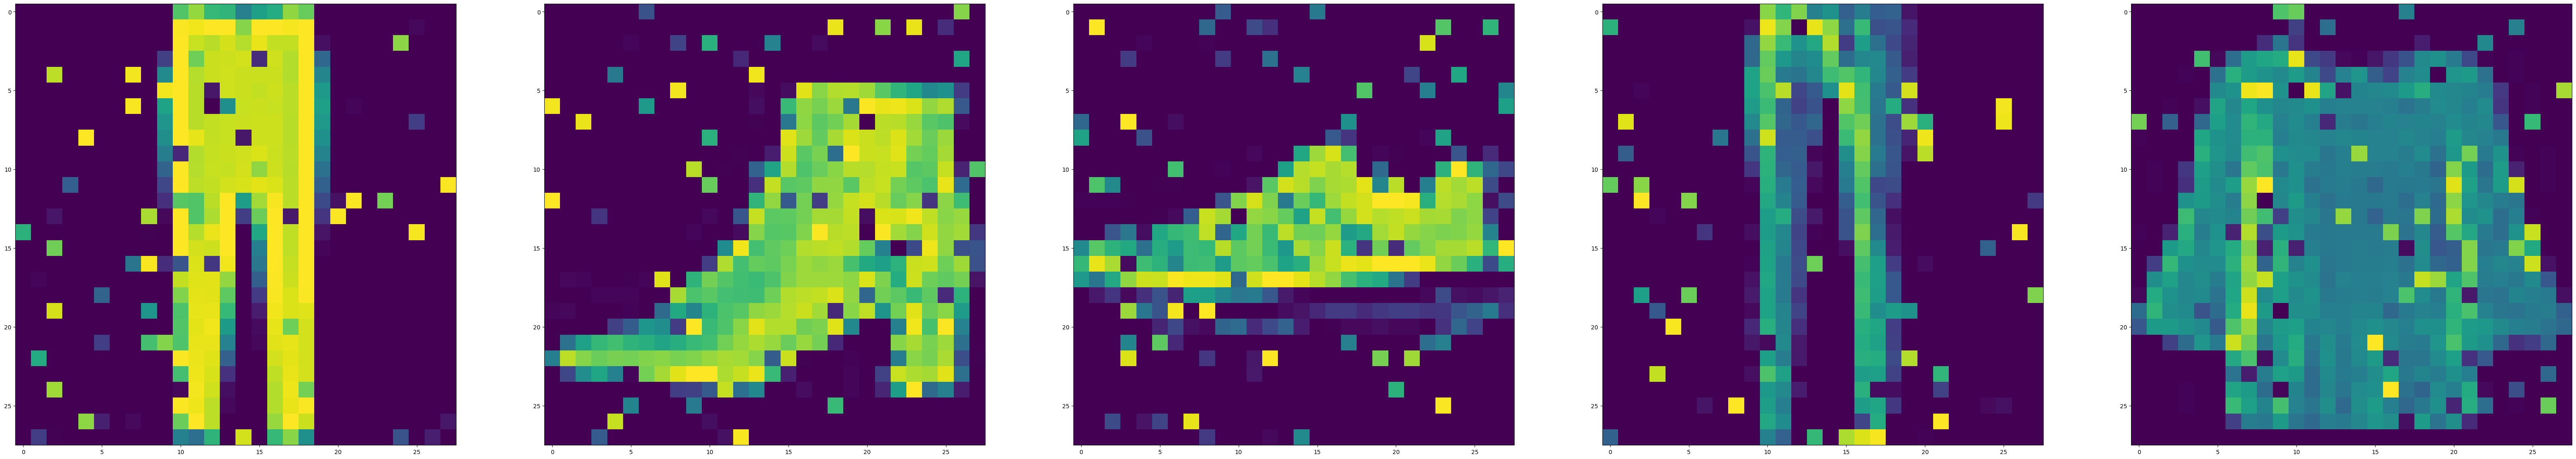

In [16]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x_n[i].reshape(28, 28))
plt.show()

In [17]:
# input layer
input_layer = Input(shape=(28, 28, 1))

# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view    = MaxPool2D( (2, 2), padding='same')(encoded_layer3)
# decoding architecture
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer   = Conv2D(1, (3, 3), padding='same')(decoded_layer3)

# compile the model
model_2 = Model(input_layer, output_layer)
model_2.compile(optimizer='adam', loss='mse')

In [18]:
model_2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 1)           │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,761 (194.38 KB)

 Trainable params: 49,761 (194.38 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history = model_2.fit(train_x_n, train_x, epochs=10, batch_size=2048, validation_data=(val_x_n, val_x), callbacks=[early_stopping])

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 166s 7s/step - loss: 0.1383 - val_loss: 0.0700
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 199s 7s/step - loss: 0.0587 - val_loss: 0.0418
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 203s 7s/step - loss: 0.0390 - val_loss: 0.0328
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 200s 7s/step - loss: 0.0316 - val_loss: 0.0281
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 159s 7s/step - loss: 0.0274 - val_loss: 0.0254
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 202s 7s/step - loss: 0.0248 - val_loss: 0.0235
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 160s 7s/step - loss: 0.0233 - val_loss: 0.0227
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 161s 7s/step - loss: 0.0223 - val_loss: 0.0214
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 201s 7s/step - loss: 0.0213 - val_loss: 0.0209
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 203s 7s/step - loss: 0.0207 - val_loss: 0.0202


In [21]:
model_2.save('autoencoder_2_model_image_denoising.h5')


In [22]:
from google.colab import files
files.download('autoencoder_2_model_image_denoising.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
from google.colab import files

# Upload .h5 file
uploaded = files.upload()


Saving autoencoder_2_model_image_denoising.h5 to autoencoder_2_model_image_denoising.h5


In [10]:
from keras.models import load_model
from keras.losses import MeanSquaredError

# Load model with custom objects
model = load_model('/content/autoencoder_2_model_image_denoising.h5', custom_objects={'mse': MeanSquaredError()})

# Verify the model
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 1)           │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,763 (194.39 KB)

 Trainable params: 49,761 (194.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


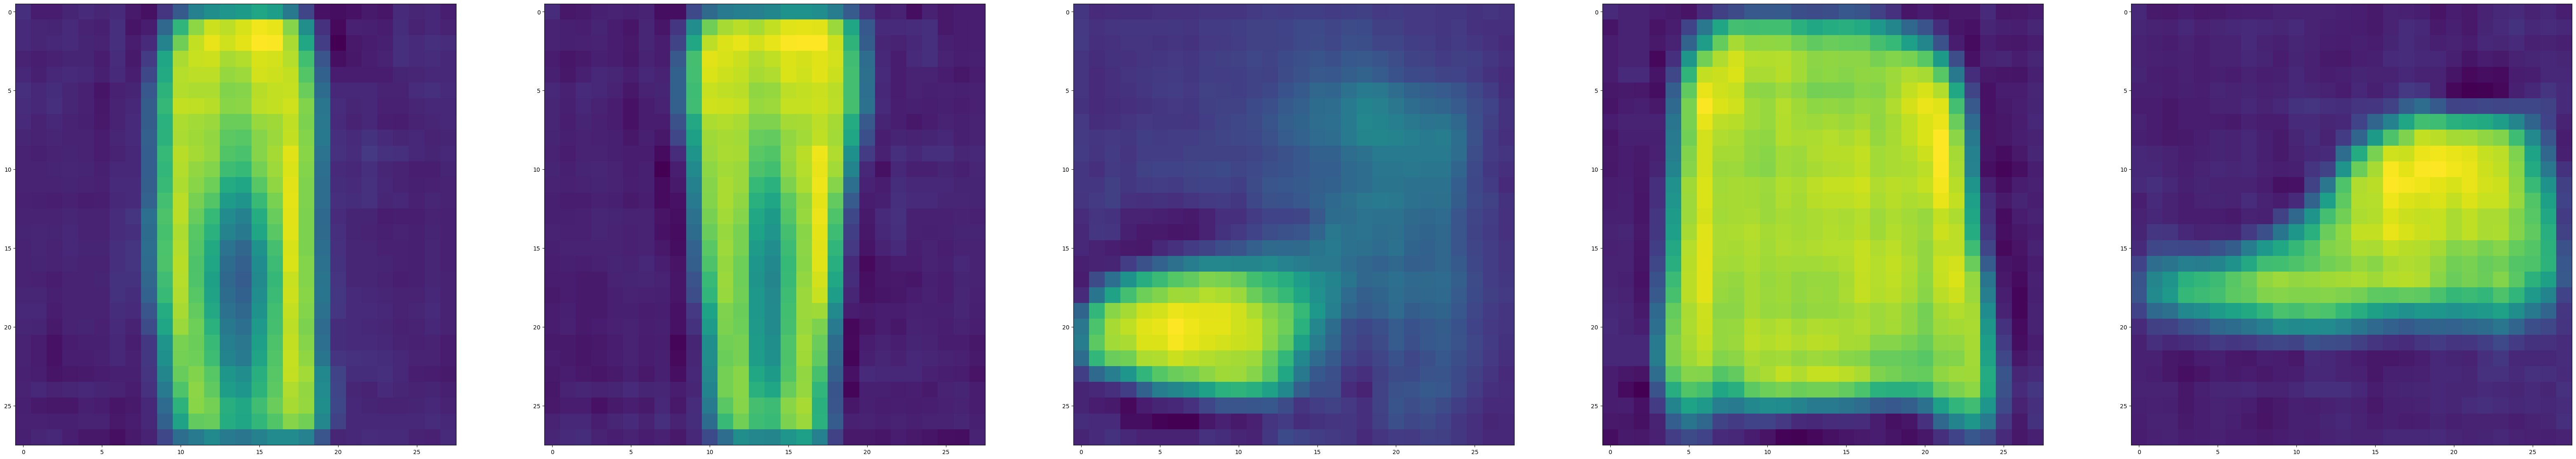

In [11]:
preds = model.predict(val_x_n[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(preds[i].reshape(28, 28))
plt.show()

**Use Case 3: Sequence to Sequence Prediction using AutoEncoders**

Autoencoder Architecture
The architecuture of this use case will contain an encoder to encode the source sequence and second to decode the encoded source sequence into the target sequence, called the decoder. First lets understand the internal working of LSTMs which will be used in this architecture.

The Long Short-Term Memory, or LSTM, is a recurrent neural network that is comprised of internal gates.
Unlike other recurrent neural networks, the network’s internal gates allow the model to be trained successfully using backpropagation through time, or BPTT, and avoid the vanishing gradients problem.
We can define the number of LSTM memory units in the LSTM layer, Each unit or cell within the layer has an internal memory / cell state, often abbreviated as “c“, and outputs a hidden state, often abbreviated as “h“.
By using Keras, we can access both output states of the LSTM layer as well as the current states of the LSTM layers.
Lets now create an autoencoder architecutre for learning and producing sequences made up of LSTM layers. There are two components:

An encoder architecture which takes a sequence as input and returns the current state of LSTM as the output
A decoder architecture which takes the sequence and encoder LSTM states as input and returns the decoded output sequence
We are saving and accessing hidden and memory states of LSTM so that we can use them while generating predictions on unseen data.
Lets first of all, generate a sequence dataset containing random sequences of fixed lengths. We will create a function to generate random sequences.

X1 repersents the input sequence containing random numbers
X2 repersents the padded sequence which is used as the seed to reproduce the other elements of the sequence
y repersents the target sequence or the actual sequence

In [12]:
def dataset_preparation(n_in, n_out, n_unique, n_samples):
    X1, X2, y = [], [], []
    for _ in range(n_samples):
        ## create random numbers sequence - input
        inp_seq = [randint(1, n_unique-1) for _ in range(n_in)]

        ## create target sequence
        target = inp_seq[:n_out]

        ## create padded sequence / seed sequence
        target_seq = list(reversed(target))
        seed_seq = [0] + target_seq[:-1]

        # convert the elements to categorical using keras api
        X1.append(to_categorical([inp_seq], num_classes=n_unique))
        X2.append(to_categorical([seed_seq], num_classes=n_unique))
        y.append(to_categorical([target_seq], num_classes=n_unique))

    # remove unnecessary dimention
    X1 = np.squeeze(np.array(X1), axis=1)
    X2 = np.squeeze(np.array(X2), axis=1)
    y  = np.squeeze(np.array(y), axis=1)
    return X1, X2, y

samples = 100000
features = 51
inp_size = 6
out_size = 3

inputs, seeds, outputs = dataset_preparation(inp_size, out_size, features, samples)
print("Shapes: ", inputs.shape, seeds.shape, outputs.shape)
print ("Here is first categorically encoded input sequence looks like: ", )
inputs[0][0]

Shapes:  (100000, 6, 51) (100000, 3, 51) (100000, 3, 51)
Here is first categorically encoded input sequence looks like: 


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
def define_models(n_input, n_output):
    ## define the encoder architecture
    ## input : sequence
    ## output : encoder states
    encoder_inputs = Input(shape=(None, n_input))
    encoder = LSTM(128, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    encoder_states = [state_h, state_c]

    ## define the encoder-decoder architecture
    ## input : a seed sequence
    ## output : decoder states, decoded output
    decoder_inputs = Input(shape=(None, n_output))
    decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = Dense(n_output, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

    ## define the decoder model
    ## input : current states + encoded sequence
    ## output : decoded sequence
    encoder_model = Model(encoder_inputs, encoder_states)
    decoder_state_input_h = Input(shape=(128,))
    decoder_state_input_c = Input(shape=(128,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

    return model, encoder_model, decoder_model

autoencoder, encoder_model, decoder_model = define_models(features, features)

In [14]:
encoder_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, 51)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ [(None, 128), (None, 128),  │          92,160 │
│                                      │ (None, 128)]                │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,160 (360.00 KB)

 Trainable params: 92,160 (360.00 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
decoder_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, None, 51)       │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 128)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 128)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, None, 128),    │         92,160 │ input_layer_1[0][0],   │
│                           │ (None, 128), (None,    │                │ input_layer_2[0][0],   │
│                           │ 128)]                  │                │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, None, 51)       │          6,579 │ lstm_1[1][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 98,739 (385.70 KB)

 Trainable params: 98,739 (385.70 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, 51)       │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, None, 51)       │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 128), (None,   │         92,160 │ input_layer[0][0]      │
│                           │ 128), (None, 128)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, None, 128),    │         92,160 │ input_layer_1[0][0],   │
│                           │ (None, 128), (None,    │                │ lstm[0][1], lstm[0][2] │
│                           │ 128)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, None, 51)       │          6,579 │ lstm_1[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 190,899 (745.70 KB)

 Trainable params: 190,899 (745.70 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
autoencoder.fit([inputs, seeds], outputs, epochs=1)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - acc: 0.5538 - loss: 1.4401


In [18]:
def reverse_onehot(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]

def predict_sequence(encoder, decoder, sequence):
    output = []
    target_seq = np.array([0.0 for _ in range(features)])
    target_seq = target_seq.reshape(1, 1, features)

    current_state = encoder.predict(sequence)
    for t in range(out_size):
        pred, h, c = decoder.predict([target_seq] + current_state)
        output.append(pred[0, 0, :])
        current_state = [h, c]
        target_seq = pred
    return np.array(output)

In [19]:
for k in range(5):
    X1, X2, y = dataset_preparation(inp_size, out_size, features, 1)
    target = predict_sequence(encoder_model, decoder_model, X1)
    print('\nInput Sequence=%s SeedSequence=%s, PredictedSequence=%s'
          % (reverse_onehot(X1[0]), reverse_onehot(y[0]), reverse_onehot(target)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

Input Sequence=[32, 7, 38, 19, 34, 43] SeedSequence=[38, 7, 32], PredictedSequence=[38, 7, 32]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Input Sequence=[1, 22, 6, 42, 28, 16] SeedSequence=[6, 22, 1], PredictedSequence=[6, 22, 1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Input Sequence=[19, 22, 13, 3, 42, 31] SeedSequence=[13, 22, 19], PredictedSequence=[13, 22, 19]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Input Sequence=[41, 39, 50, 31, 43, 19] SeedSequence=[50, 39, 41], PredictedSequence=[50, 39, 41]
1/1